# Crea ti WordCloud con AI

En el presente notebook podrás transcribir un audio y crear una Wordcloud usando distimntas técnicas, una de ellas usando el poder de procesamiento de GPT-4

##Índice del notebook

1) Instalar libraries a utilizar

2) Cargar claves de API de OPENAI
3) Transcribir audio a texto con Whisper

4) Crear WordCloud

  *4.1) Crear WordCloud sin trabajar el texto*

  *4.2) Crear WordCloud eliminando las StopWord del español*

  *4.3) Crear WordCloud con GPT-4*






###Instalar librareías para usar en el proyecto

Hice correr este notebook en [Google Colaboratory](https://colab.research.google.com/), así que tuve que instalar algunas libraries

In [2]:
#!pip install python-dotenv

In [4]:
#!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00


In [6]:
# Importar librerías que usaremos
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import pandas as pd
from openai import OpenAI
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import spacy
from collections import Counter
import wordcloud
from wordcloud import WordCloud

# Descargar recursos de NLTK si es necesario
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

###Carga de claves API OPENAI

In [ ]:
# Función para utilizar la clave API de OPENAI
def get_openai_api_key():
    # Cargar variables de entorno desde el archivo .env si existe
    load_dotenv()

    # Intentar obtener el valor de la variable de entorno OPENAI_API_KEY
    api_key = os.getenv('OPENAI_API_KEY')

    # Si no se encuentra la API Key o si el usuario prefiere, pedir que la ingrese manualmente
    if not api_key:
        api_key = input("Introduce tu clave de API de OpenAI: ")

    return api_key

# Inicializar el cliente
API_KEY = get_openai_api_key()
client = OpenAI(api_key=API_KEY)

###Transcribir audio


In [8]:
# Abrir el archivo de audio en modo de lectura binaria
with open("audio.mp3", "rb") as audio_file:
    # Crear la transcripción del audio utilizando el cliente de OpenAI
    transcript_primera_reunion = client.audio.transcriptions.create(
        model="whisper-1",
        file=audio_file
    )



In [9]:
# Escribir la transcripción en un archivo de texto
with open("texto.txt", "w") as txt_file:
    txt_file.write(transcript_primera_reunion.text)

In [10]:
# Leer el contenido del archivo de transcripción
transcription_file = "texto.txt"
with open(transcription_file, "r") as file:
    transcription = file.read()

# Tokenización y eliminación de palabras vacías
stop_words = set(stopwords.words("spanish"))
lemmatizer = WordNetLemmatizer()

tokens = word_tokenize(transcription.lower())
cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]

# Contar la frecuencia de las palabras
word_freq = Counter(cleaned_tokens)

# Obtener las palabras más comunes
most_common_words = word_freq.most_common(30)
print("Palabras más comunes:", most_common_words)

Palabras más comunes: [('entonces', 69), ('tema', 60), ('claro', 51), ('acá', 50), ('si', 48), ('empresa', 46), ('hacer', 40), ('ahí', 39), ('usted', 38), ('ejemplo', 38), ('después', 34), ('creo', 31), ('sé', 30), ('cosas', 29), ('bueno', 28), ('hace', 27), ('vez', 26), ('así', 26), ('día', 26), ('empresas', 25), ('tal', 24), ('años', 24), ('voy', 24), ('va', 23), ('hoy', 22), ('van', 21), ('final', 21), ('igual', 21), ('año', 20), ('trabajo', 20)]


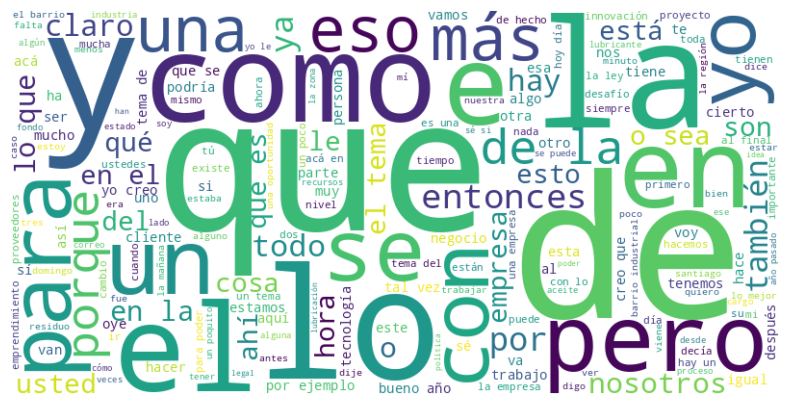

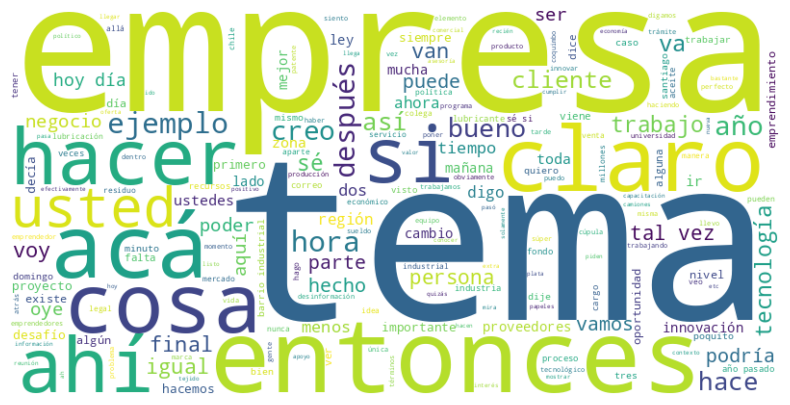

In [12]:
# Crear una nube de palabras con todas las palabras (incluyendo stopwords)
full_text = " ".join(tokens)  # Usar todos los tokens sin filtrar stopwords

wordcloud_full = WordCloud(width=800, height=400, background_color="white").generate(full_text)

# Mostrar la nube de palabras con todas las palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()# Leer el contenido del archivo de transcripción
transcription_file = "texto.txt"
with open(transcription_file, "r", encoding="utf-8") as file:
    transcription = file.read()

# Tokenización y eliminación de palabras vacías
stop_words = set(stopwords.words("spanish"))

# Tokenizar el texto
tokens = word_tokenize(transcription.lower())

# Filtrar tokens no alfanuméricos y palabras vacías
cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# Unir los tokens en un solo texto
cleaned_text = " ".join(cleaned_tokens)

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

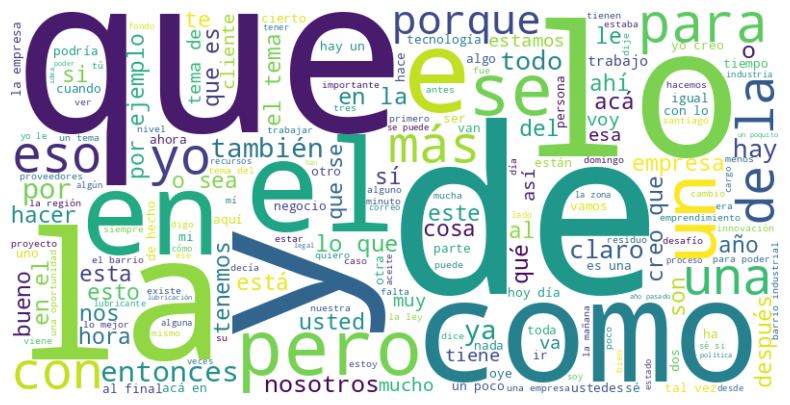

In [13]:
# Crear una nube de palabras con todas las palabras (incluyendo stopwords)
full_text = " ".join(tokens)  # Usar todos los tokens sin filtrar stopwords

wordcloud_full = WordCloud(width=800, height=400, background_color="white").generate(full_text)

# Mostrar la nube de palabras con todas las palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()